In [5]:
# Scoring functions used across the three cases

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def report_stats(predictions, y):
    """Return a dictionary of metrics on comparing the predictions to the true labels"""
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    return {'accuracy': accuracy_score(y, predictions),
            'precision': precision_score(y, predictions),
            'recall': recall_score(y, predictions),
            'F1-score': f1_score(y, predictions),
            'false positives': fp,
            'false negatives': fn}

def print_stats(stats):
    """Print the score dictionary"""
    print('\n'.join([f'{key.capitalize()}: {value}' for key, value in stats.items()]))
    
def kernel(svm):
    """Returns kernel of SVM or Pipeline"""
    params = svm.get_params()
    try:
        return params['kernel']
    except KeyError:
        for key, value in params.items():
            if key.split('__')[-1] == 'kernel':
                return value


In [6]:
# Two-dimensional plot of SVM (using PCA to reduce to two dimensions)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Function to retrain SVM model on 2D PCA-transformed data and plot decision boundaries
def retrain_and_plot_decision_boundaries(X_train, y_train, svm_model, title):
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Apply PCA to reduce the features to 2 dimensions for visualization
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    # Retrain SVM model on 2D PCA-transformed data
    svm_model.fit(X_train_pca, y_train)

    # Plotting decision boundaries
    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()


In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

def SVM_accuracy():
    pipeline = Pipeline([
        ('scaler', PowerTransformer()),  # Feature scaling
        ('svm', SVC(kernel='linear'))  # Linear SVM
    ])
    param_grid = {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Different values of C
    }
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    
    best_model = grid_search.best_estimator_
    
    return best_model





Accuracy: 0.9883040935672515
Precision: 0.9907407407407407
Recall: 0.9907407407407407
F1-score: 0.9907407407407407
False positives: 1
False negatives: 1


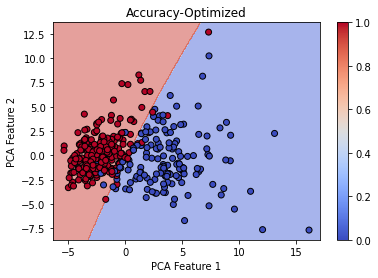

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate accuracy
svm = SVM_accuracy()
assert kernel(svm) == 'linear', 'SVM should use a linear kernel'
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = report_stats(predictions, y_test)
print_stats(score)
retrain_and_plot_decision_boundaries(X_train, y_train, SVM_accuracy(), 'Accuracy-Optimized')

In [88]:
assert score['accuracy'] > .988, f'Your accuracy is too low at {100*score["accuracy"]:.2f}%'
print(f'Your accuracy of {100*score["accuracy"]:.2f}% is > 98.8%')

Your accuracy of 98.83% is > 98.8%


In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

def SVM_precision():
    pipeline = Pipeline([
        ('scaler', PowerTransformer()),  # Feature scaling
        ('svm', SVC(kernel='sigmoid',gamma=0.1,coef0=0.5))  # Linear SVM
    ])
    param_grid = {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Different values of C
    }
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='precision')
    grid_search.fit(X_train, y_train)
    
    
    best_model = grid_search.best_estimator_
    
    return best_model


Accuracy: 0.9532163742690059
Precision: 1.0
Recall: 0.9259259259259259
F1-score: 0.9615384615384615
False positives: 0
False negatives: 8


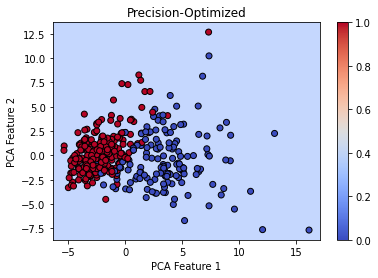

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate precision
svm = SVM_precision()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = report_stats(predictions, y_test)
print_stats(score)
retrain_and_plot_decision_boundaries(X_train, y_train, SVM_precision(), 'Precision-Optimized')

In [85]:
assert score['precision'] > .999, f'Your precision is too low at {100*score["precision"]:.2f}%'
print(f'Your precision of {100*score["precision"]:.2f}% is close enough to 100%')

Your precision of 100.00% is close enough to 100%


In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def SVM_recall():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('svm', SVC(kernel='linear'))  # Linear SVM
    ])
    param_grid = {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Different values of C
    }
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    
    best_model = grid_search.best_estimator_
    
    return best_model


Accuracy: 0.9883040935672515
Precision: 0.9818181818181818
Recall: 1.0
F1-score: 0.9908256880733944
False positives: 2
False negatives: 0


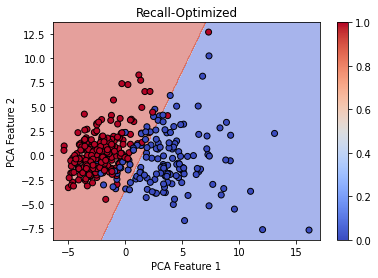

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate recall
svm = SVM_recall()
assert kernel(svm) != 'rbf', 'SVM should not use an RBF kernel'
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = report_stats(predictions, y_test)
print_stats(score)
retrain_and_plot_decision_boundaries(X_train, y_train, SVM_recall(), 'Recall-Optimized')

In [114]:
assert kernel(svm) != 'rbf', 'SVM should not use an RBF kernel'
assert score['recall'] > .999, f'Your recall is too low at {100*score["recall"]:.2f}%'
print(f'Your recall of {100*score["recall"]:.2f}% is close enough to 100%')

Your recall of 100.00% is close enough to 100%
